# Shift-invariance in the PDWT domain

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt
from io_stuff import *
from color import *

### Create the three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [5]:
%%bash
jupyter nbconvert --to notebook --execute create_moving_circles.ipynb

[NbConvertApp] Converting notebook create_moving_circles.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 86414 bytes to create_moving_circles.nbconvert.ipynb


### Load the images

In [6]:
prefix = "moving_circle_"
frame_0 = load_img(prefix + "000")
frame_1 = load_img(prefix + "001")
frame_2 = load_img(prefix + "002")

### Work only with luma

In [7]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

### 2D-DWT of the frames

In [8]:
f0_haar_L, (f0_haar_LH, f0_haar_HL, f0_haar_HH) = pywt.dwt2(frame_0_Y, 'haar')
f1_haar_L, (f1_haar_LH, f1_haar_HL, f1_haar_HH) = pywt.dwt2(frame_1_Y, 'haar')
f2_haar_L, (f2_haar_LH, f2_haar_HL, f2_haar_HH) = pywt.dwt2(frame_2_Y, 'haar')

### Creation of the [H] subbands
Remember that the L subband is the same that in the DWT.

In [9]:
f0_haar_iH = pywt.idwt2([None,(f0_haar_LH, f0_haar_HL, f0_haar_HH)], 'haar')
f1_haar_iH = pywt.idwt2([None,(f1_haar_LH, f1_haar_HL, f1_haar_HH)], 'haar')
f2_haar_iH = pywt.idwt2([None,(f2_haar_LH, f2_haar_HL, f2_haar_HH)], 'haar')

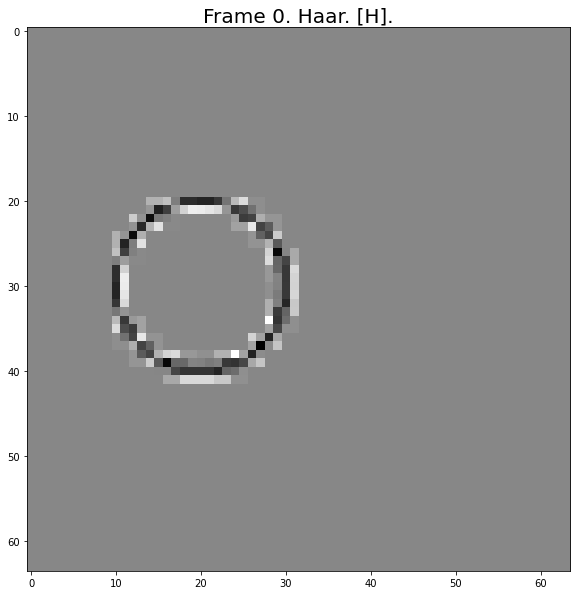

In [10]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. [H].", fontsize=20)
plt.imshow(f0_haar_iH, cmap="gray")
plt.savefig('f0_haar_iH.png')
plt.show()

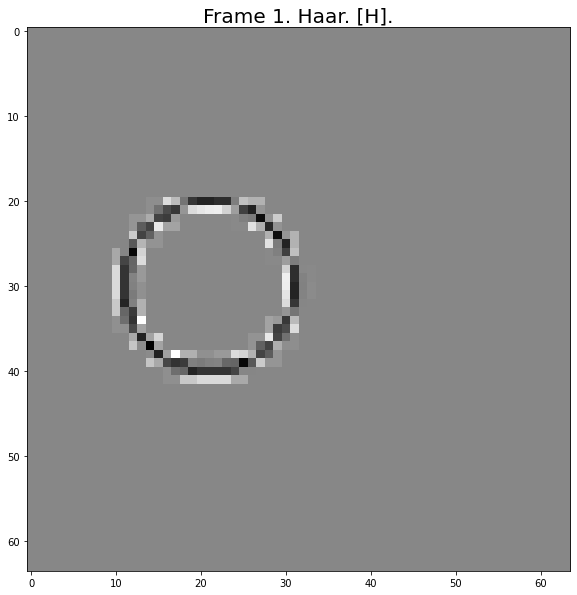

In [11]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. [H].", fontsize=20)
plt.imshow(f1_haar_iH, cmap="gray")
plt.savefig('f1_haar_iH.png')
plt.show()

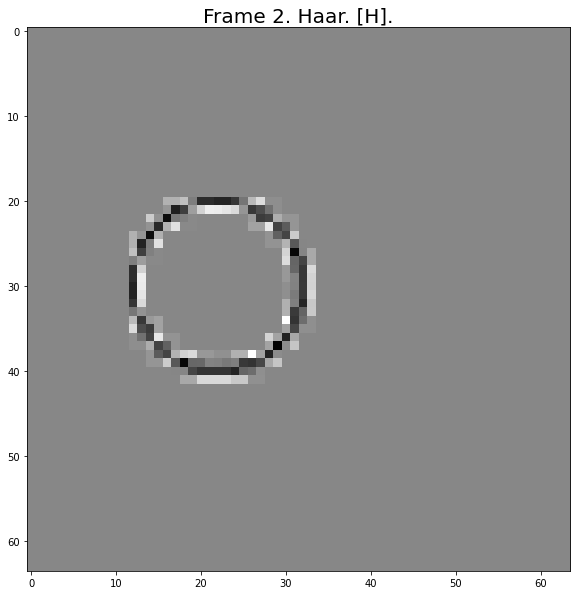

In [12]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. [H].", fontsize=20)
plt.imshow(f2_haar_iH, cmap="gray")
plt.savefig('f2_haar_iH.png')
plt.show()

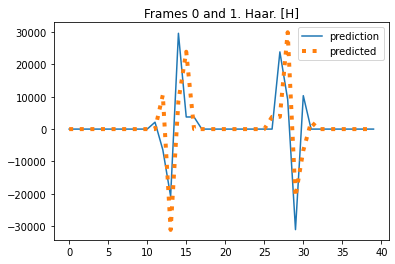

In [13]:
plt.title("Frames 0 and 1. Haar. [H]")
plt.plot(np.roll(f0_haar_iH[36, 0:40], 1), label="prediction")
plt.plot(f1_haar_iH[36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_iH.svg")
plt.show()

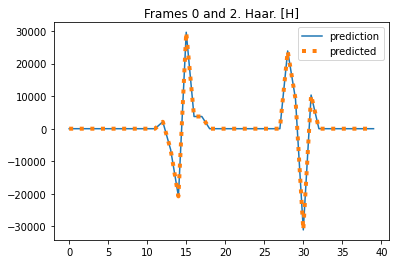

In [14]:
plt.title("Frames 0 and 2. Haar. [H]")
plt.plot(np.roll(f0_haar_iH[36, 0:40], 2), label="prediction")
plt.plot(f2_haar_iH[36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_iH.svg")
plt.show()